# Build grid of figures in Matplotlib

In [1]:
%matplotlib inline

In [25]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

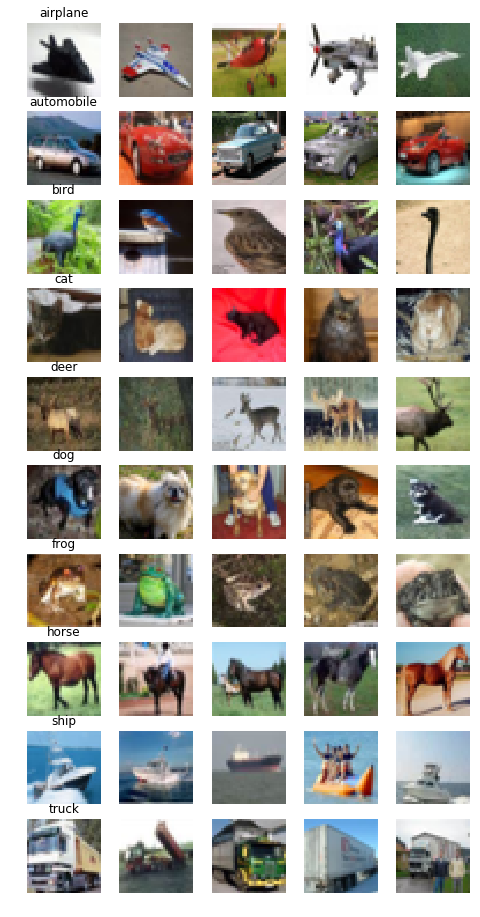

In [35]:
from keras.datasets import cifar10
import numpy as np
from pprint import pprint

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

cifar10_categories = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

def get_images_by_category(category_idx):
    return x_train[np.where(y_train == category_idx)[0]]

items_in_a_row = 5
rows = len(cifar10_categories)
grid_width = 8

plt.figure(figsize=(grid_width, grid_width / items_in_a_row * rows))
gs = gridspec.GridSpec(rows, items_in_a_row)

for category_idx, category_title in enumerate(cifar10_categories):
    for image_idx, image in enumerate(get_images_by_category(category_idx)[:items_in_a_row]):
        plt.subplot(gs[category_idx, image_idx])
        plt.axis('off')
        plt.imshow(image, interpolation='none')
        if image_idx == 0:
            plt.title(category_title)

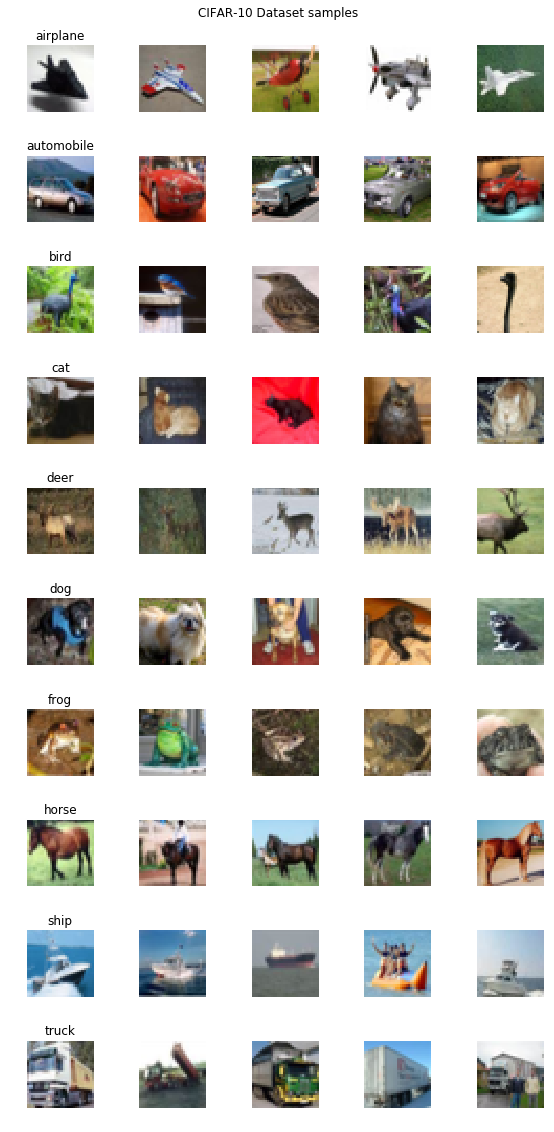

In [64]:
def grid_of_images(cols, rows, image_callback, grid_width=8):
    plt.figure(figsize=(grid_width, grid_width / cols * rows))
    gs = gridspec.GridSpec(rows, cols)

    for row_idx in range(rows):
        for col_idx in range(cols):
            plt.subplot(gs[row_idx, col_idx])
            plt.axis('off')
            image, title = image_callback(row_idx, col_idx)
            plt.imshow(image, interpolation='none')
            if title is not None:
                plt.title(title)
    plt.tight_layout()
                
                
def get_image(category_idx, image_idx):
    return get_images_by_category(category_idx)[image_idx], cifar10_categories[category_idx] if image_idx == 0 else None

grid_of_images(5, len(cifar10_categories), get_image, grid_width=8)
plt.suptitle('CIFAR-10 Dataset samples')
plt.tight_layout(rect=[0, 0, 1, 0.97])